# Гомография
## 1) взять код и сделать самостоятельно панараму больше чем на 2-х снимках,
## 2) взять код который занимается триангуляцией на основе афинной гомографии, придумать и реализовать метод автоматического триангулирования (по ключивым точкам лица с помошбю нейронки, взять шар и по окружности триангулировать) и приминить для своей фотографии.
код в виде архива и празантация


# Панарама

код взят из switching.py

In [ ]:
!pip install numpy==1.21.6 opencv-contrib-python==4.7.0.72 opencv-python==4.7.0.72 openpyxl==2.5.6 scipy matplotlib

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


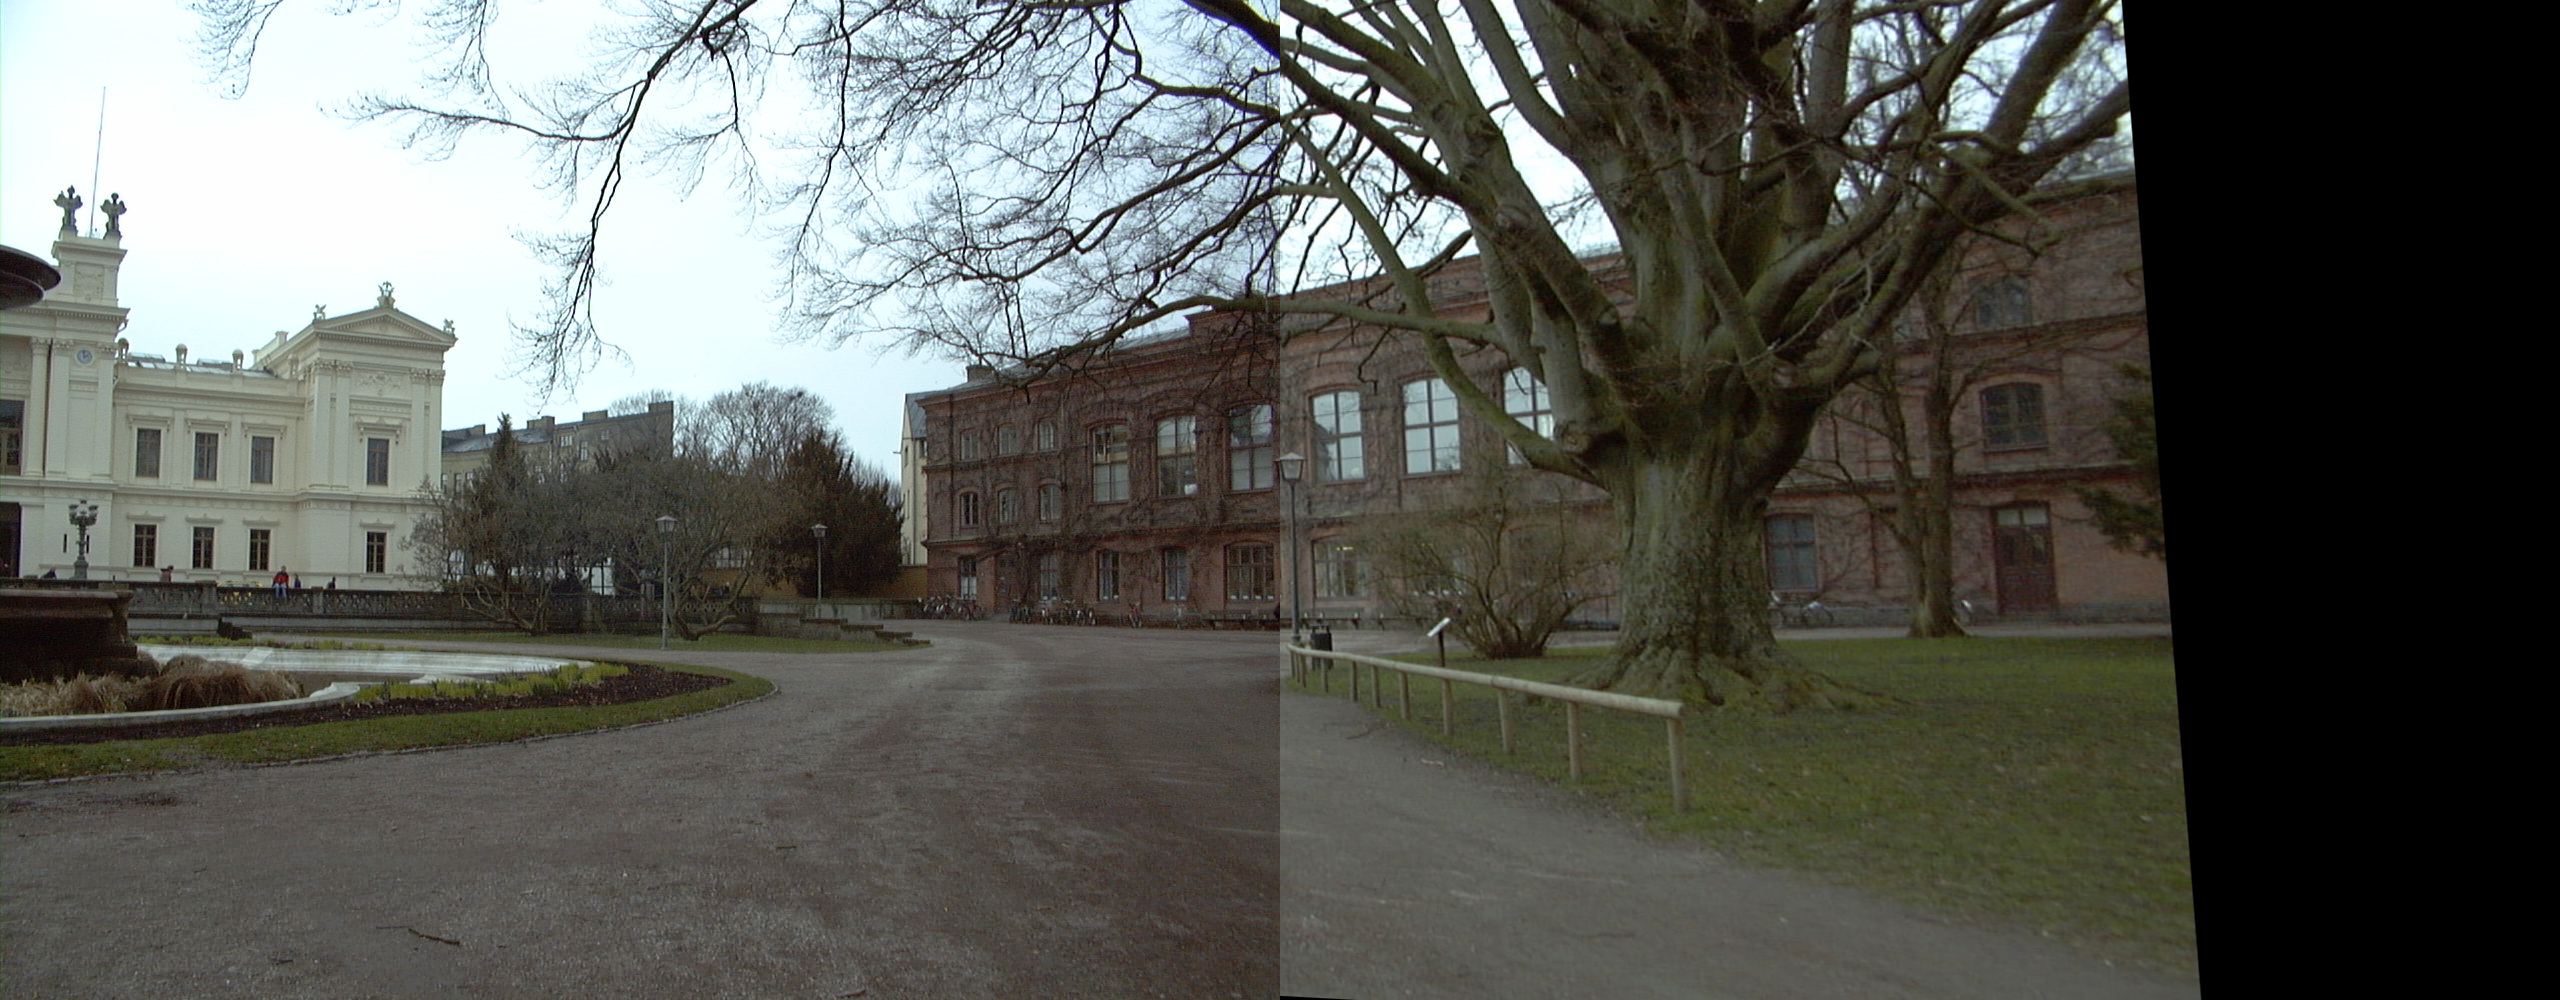

In [69]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Загрузка изображений
img1 = cv2.imread('/content/drive/MyDrive/Univ1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Univ2.jpg')

# Преобразование изображений в оттенки серого
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Инициализация объекта SIFT (определение ключевых точек)
sift = cv2.xfeatures2d.SIFT_create()

# Нахождение ключевых точек и дескрипторов на обоих изображениях
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Нахождение соответствий между дескрипторами на двух изображениях
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
matches = matcher.knnMatch(des1, des2, k=2)

# Фильтрация соответствий с помощью метрики Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Нахождение матрицы гомографии
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
# Преобразование изображений
panorama = cv2.warpPerspective(img1, H, (img1.shape[1] + img2.shape[1], img2.shape[0]))
panorama[0:img2.shape[0], 0:img2.shape[1]] = img2

# Отображение результата
cv2_imshow(panorama)
cv2.waitKey()
cv2.destroyAllWindows()

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def search_H(img1, img2):
    # Преобразование изображений в оттенки серого
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Инициализация объекта SIFT (определение ключевых точек)
    sift = cv2.xfeatures2d.SIFT_create()

    # Нахождение ключевых точек и дескрипторов на обоих изображениях
    kp1, des1 = sift.detectAndCompute(gray1, None)
    kp2, des2 = sift.detectAndCompute(gray2, None)

    # Нахождение соответствий между дескрипторами на двух изображениях
    matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
    matches = matcher.knnMatch(des1, des2, k=2)

    # Фильтрация соответствий с помощью метрики Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Нахождение матрицы гомографии
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    return H

def connect_to_left(img1, img2):
    H = search_H(img1, img2)
    # Преобразование изображений
    panorama = cv2.warpPerspective(img1, H, (img1.shape[1] + img2.shape[1], img2.shape[0]))
    panorama[0:img2.shape[0], 0:img2.shape[1]] = img2
    return panorama


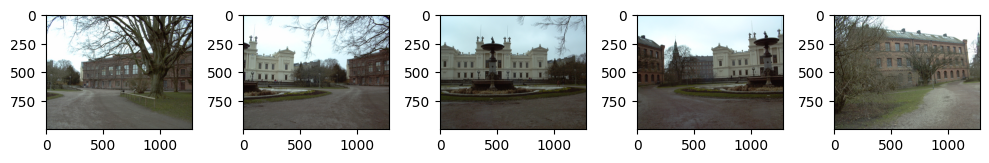

In [71]:

# Загрузка изображений
path1='2_sem/6_labs/data/Univ1.jpg'
path2='2_sem/6_labs/data/Univ2.jpg'
path3='2_sem/6_labs/data/Univ3.jpg'
path4='2_sem/6_labs/data/Univ4.jpg'
path5='2_sem/6_labs/data/Univ5.jpg'
# '2_sem/6_labs/data/Univ5.jpg'

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
for i, image_pat in enumerate([path1,path2,path3,path4,path5]):
    image = plt.imread(image_pat)
    axs.flat[i].imshow(image)
plt.tight_layout()
plt.show()

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
img3 = cv2.imread(path3)
img4 = cv2.imread(path4)
img5 = cv2.imread(path5)


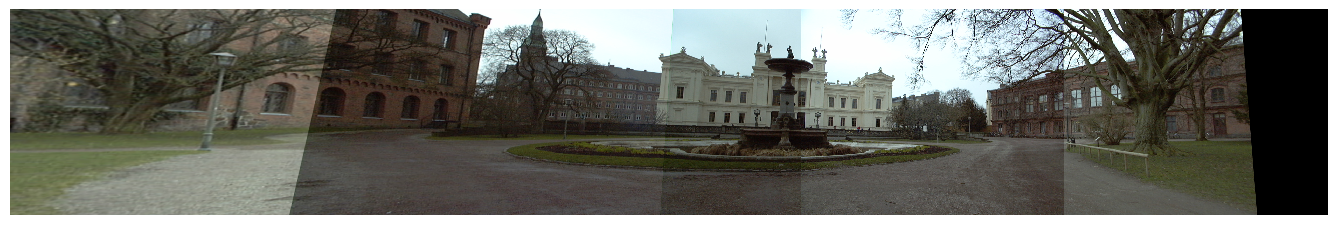

In [95]:
panorama =connect_to_left(cv2.flip(img5,1),cv2.flip(img4,1))
panorama = connect_to_left(panorama,cv2.flip(img3,1))
panorama = connect_to_left(panorama,cv2.flip(img2,1) )
# panorama = connect_to_left(panorama,cv2.flip(img5,1),)
panorama = connect_to_left(img1,cv2.flip(panorama,1))
# panorama=cv2.flip(panorama,1)
# img5=cv2.flip(img5,1)
# panorama = connect_to_left(img5,panorama)
plt.figure(figsize = (17,10))
plt.axis('off')
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB), interpolation='nearest')


# Триангуляция
## triangles_vidio.py в видеопатоке находит прямаугольники черного цвета на белом боне и заменяет их на изображение автоматически триангулируя его.

## Пример для фотографии

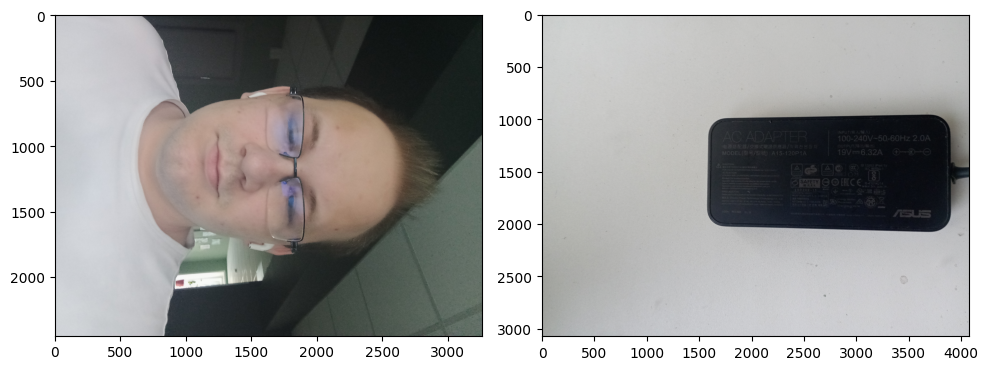

In [100]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
for i, image_pat in enumerate(['2_sem\6_labs\data\IMG_20230618_190123.jpg','2_sem\6_labs\data\IMG_20230618_190145.jpg']):
    image = plt.imread(image_pat)
    axs.flat[i].imshow(image)
plt.tight_layout()
plt.show()

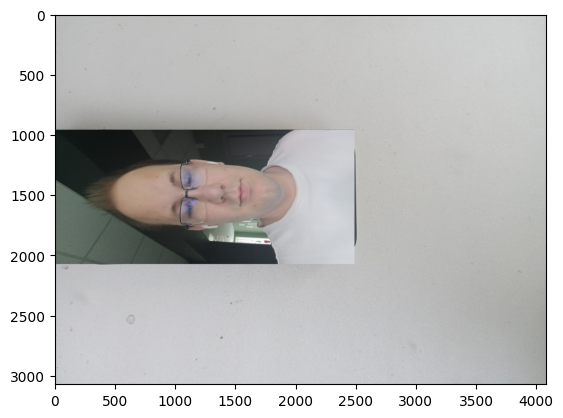

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warp
hsv_min = np.array((0, 0, 0), np.uint8)
hsv_max = np.array((255,255,60), np.uint8)
# открыть изображение для деформации
fromim = np.array(cv2.imread('/content/drive/MyDrive/IMG_20230618_190123.jpg'))
x,y = np.meshgrid(range(5),range(6))
x = (fromim.shape[1]/4) * x.flatten()
y = (fromim.shape[0]/5) * y.flatten()
x = np.array([0, fromim.shape[1],0, fromim.shape[1]])
y = np.array([0,0, fromim.shape[0], fromim.shape[0]])
# triangulate
tri = warp.triangulate_points(np.stack((x, y), axis=1)).simplices

img = np.array(cv2.imread('/content/drive/MyDrive/IMG_20230618_190145.jpg'))
img = cv2.flip(img,1)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV )
thresh = cv2.inRange(hsv, hsv_min, hsv_max)
contours0, hierarchy = cv2.findContours( thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in contours0:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.array([box[0],box[3],box[1],box[2]])
    box = np.int0(box)
    t = box.T
    t[0] =np.clip(t[0], 0, img.shape[1])
    t[1] =np.clip(t[1], 0, img.shape[0])
    box = t.T
    area = int(rect[1][0]*rect[1][1])
    if area > 500:
        # конвертировать точки в hom. координаты
        fp = np.vstack((y,x,np.ones((1,len(x)))))
        box =np.vstack((box[:,1],box[:,0],np.ones((1,len(box)))))
        # warp triangles
        img = warp.pw_affine(fromim.copy(),img,fp,box,tri)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))